In [1]:
!kaggle datasets download -d ishadss/productivity-prediction-of-garment-employees
!unzip productivity-prediction-of-garment-employees.zip

Dataset URL: https://www.kaggle.com/datasets/ishadss/productivity-prediction-of-garment-employees
License(s): copyright-authors
  0% 0.00/16.1k [00:00<?, ?B/s]
100% 16.1k/16.1k [00:00<00:00, 21.6MB/s]
Archive:  productivity-prediction-of-garment-employees.zip
  inflating: garments_worker_productivity.csv  


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('garments_worker_productivity.csv')
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [5]:
df['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [6]:
# Преобразуем переменные даты в число и уберем избыточные признаки
df['quarter'] = df['quarter'].str[-1].astype(int)

encoder = LabelEncoder()
df['day'] = encoder.fit_transform(df['day']) + 1

df.drop(['date'], axis=1, inplace=True)

df['department'] = df['department'].str.strip()
df = pd.get_dummies(df, columns=['department'])  # преобразование string переменной в численный вид с помощью One-Hot Encoding

In [7]:
df.head()

,quarter,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,department_finishing,department_sweing
0,1,4,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,False,True
1,1,4,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,True,False
2,1,4,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,False,True
3,1,4,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,False,True
4,1,4,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,False,True


In [8]:
df.describe()

,quarter,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,2.399332,3.534670,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,1.215535,1.714538,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,1.000000,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,1.000000,2.000000,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,2.000000,4.000000,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,3.000000,5.000000,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,5.000000,6.000000,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [9]:
df.isna().sum() / df.count()

,0
quarter,0.000000
day,0.000000
team,0.000000
targeted_productivity,0.000000
smv,0.000000
wip,0.732272
over_time,0.000000
incentive,0.000000
idle_time,0.000000
idle_men,0.000000


In [10]:
df.drop(['wip'], axis=1, inplace=True)  # больше 70% пропусков - переменную можно убрать, она скорее всего только ухудшит модель

<Axes: >

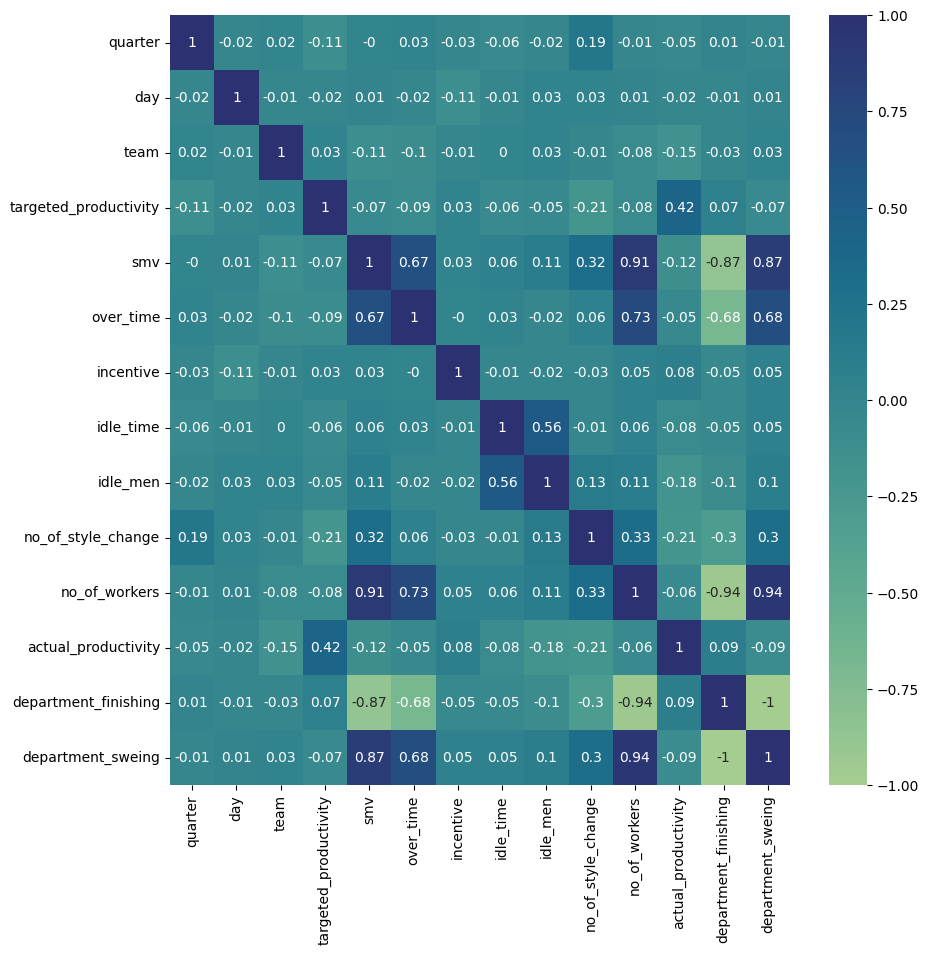

In [11]:
corr_ = df.corr(numeric_only=True)
r_corr = np.round(corr_.to_numpy(), 2)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(r_corr, annot=True, xticklabels=corr_.columns, yticklabels=corr_.columns, cmap='crest', ax=ax)

Первая модель, не изменяем данные и не используем полиномизацию

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [13]:
X = df.drop(['actual_productivity'], axis=1)
y = df['actual_productivity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
model1 = LinearRegression().fit(X_train, y_train)
y_pred = model1.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred)}\nMSE: {mean_squared_error(y_test, y_pred)}\nR2: {r2_score(y_test, y_pred)}")

MAE: 0.11554865333492767
MSE: 0.02569717337640869
R2: 0.20386700996740503


Вторая модель: пробуем ее упростить и использовать стандартизацию

In [15]:
df2 = df.copy()
df2.head()

,quarter,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,department_finishing,department_sweing
0,1,4,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725,False,True
1,1,4,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500,True,False
2,1,4,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,False,True
3,1,4,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,False,True
4,1,4,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382,False,True


In [16]:
# Пробуем упростить модель

df2['incentive_per_worker'] = df2['incentive'] / df2['no_of_workers']
df2['overtime_intensity'] = df2['over_time'] / df2['no_of_workers']
df2.drop(['department_sweing', 'no_of_workers', 'incentive', 'over_time'], axis=1, inplace=True)

In [17]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer

In [39]:
X2 = df2.drop(['actual_productivity'], axis=1)
y2 = df2['actual_productivity']

scaler2 = StandardScaler()
X_scaled2 = scaler2.fit_transform(X2)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled2, y2, test_size=0.3)

In [40]:
model2 = LinearRegression().fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)
print(f"MAE: {mean_absolute_error(y_test2, y_pred2)}\nMSE: {mean_squared_error(y_test2, y_pred2)}\nR2: {r2_score(y_test2, y_pred2)}")

MAE: 0.11032276045863579
MSE: 0.023929159490341856
R2: 0.24093252111131125


Третья модель: пробуем убрать признаки с низкой корреляцией с целевой переменной, используем стандартизацию, полиномизацию

<Axes: xlabel='idle_time'>

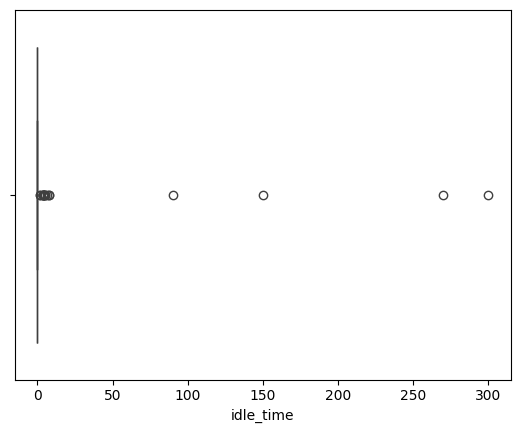

In [20]:
sns.boxplot(data=df2, x='idle_time')

In [21]:
df3 = df2[df2['idle_time'] <= 50].copy()

<Axes: >

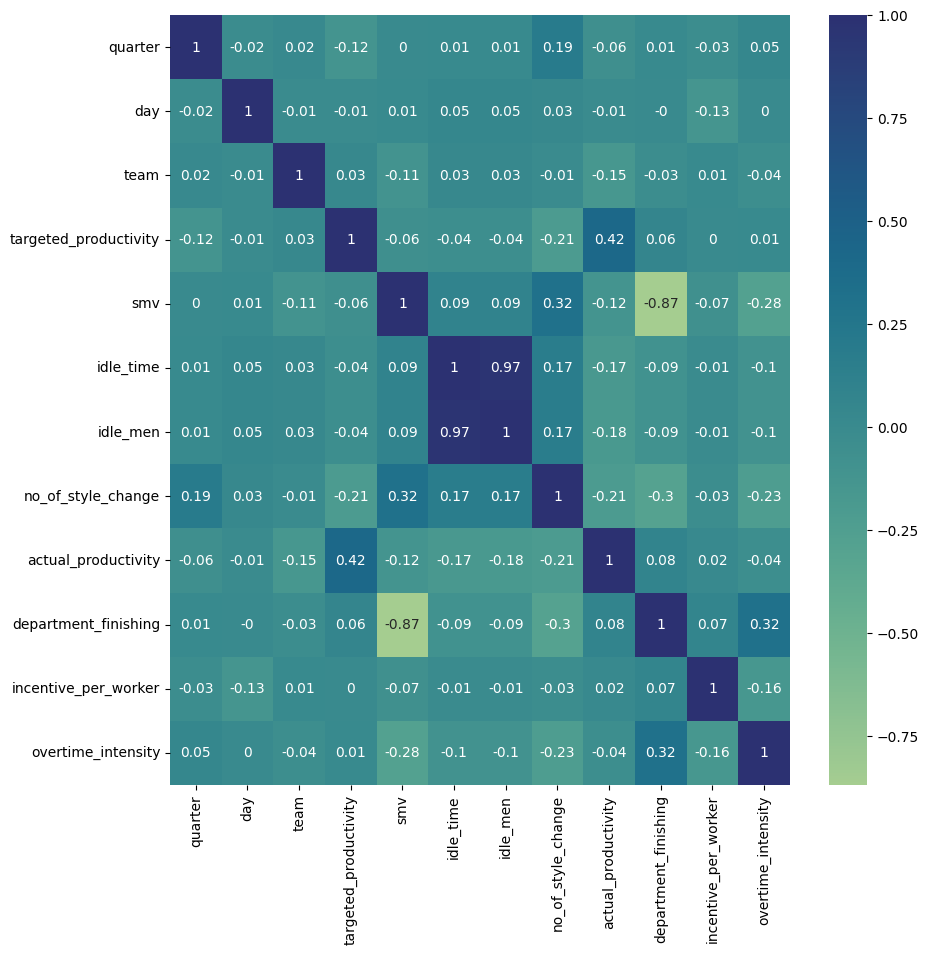

In [22]:
corr_ = df3.corr(numeric_only=True)
r_corr = np.round(corr_.to_numpy(), 2)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(r_corr, annot=True, xticklabels=corr_.columns, yticklabels=corr_.columns, cmap='crest', ax=ax)

In [23]:
df3.drop(['quarter', 'day', 'overtime_intensity'], axis=1, inplace=True)

In [33]:
X3 = df3.drop(['actual_productivity'], axis=1)
y3 = df3['actual_productivity']

scaler3 = StandardScaler()
X_scaled3 = scaler3.fit_transform(X3)
poly = PolynomialFeatures(degree=2, include_bias=True)
X_poly3 = poly.fit_transform(X_scaled3)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_poly3, y3, test_size=0.3)

In [34]:
model3 = LinearRegression().fit(X_train3, y_train3)
y_pred3 = model3.predict(X_test3)
print(f"MAE: {mean_absolute_error(y_test3, y_pred3)}\nMSE: {mean_squared_error(y_test3, y_pred3)}\nR2: {r2_score(y_test3, y_pred3)}")

MAE: 0.08915280980973521
MSE: 0.016563066553267853
R2: 0.39002565162963776


Четвертая модель: пробуем не убирать данные, используем полиномизацию, стандартизацию

In [26]:
df4 = df.copy()

In [37]:
X4 = df4.drop(['actual_productivity'], axis=1)
y4 = df4['actual_productivity']

scaler4 = StandardScaler()
X_scaled4 = scaler4.fit_transform(X4)
poly = PolynomialFeatures(degree=2, include_bias=True)
X_poly4 = poly.fit_transform(X_scaled4)

X_train4, X_test4, y_train4, y_test4 = train_test_split(X_poly4, y4, test_size=0.2)

In [38]:
model4 = LinearRegression().fit(X_train4, y_train4)
y_pred4 = model4.predict(X_test4)
print(f"MAE: {mean_absolute_error(y_test4, y_pred4)}\nMSE: {mean_squared_error(y_test4, y_pred4)}\nR2: {r2_score(y_test4, y_pred4)}")

MAE: 0.09443135090373506
MSE: 0.018822459531988113
R2: 0.37542932303293053


In [42]:
model4.coef_

array([ 2.80441492e-16, -5.36143905e-03,  4.81782285e-03, -1.51535856e-02,
        8.00507914e-02,  1.91362344e-01, -5.12674439e-02,  2.46392027e-01,
        1.72997737e-03, -2.90597354e-02, -4.22058589e-02,  1.77861456e-01,
        1.77138711e-01, -1.77138711e-01,  9.71346434e-03, -7.16811253e-03,
       -2.90430615e-03, -5.28888209e-03,  4.75883407e-03, -6.60581206e-04,
        4.60719037e-03, -6.40357324e-03, -5.19752468e-03, -7.24726863e-03,
       -4.31654033e-05,  1.07379271e-03, -1.07379271e-03, -2.20241434e-03,
        7.19959388e-03, -3.45459905e-03, -1.99625325e-02, -5.02956022e-04,
        6.71566561e-02,  9.65592769e-03, -1.30012350e-02,  7.21013584e-03,
        1.27018280e-02,  4.57606840e-03, -4.57606840e-03,  1.69118870e-02,
        7.97942026e-03,  1.49855250e-03,  1.58679475e-03, -9.22474019e-03,
       -6.01465280e-03,  2.15092819e-02,  7.34183919e-03,  3.82755422e-02,
        1.36350195e-02, -1.36350195e-02,  1.29372226e-02, -4.71277835e-03,
        1.33777578e-02,  

Вывод: можно предположить, что зависимость между целевой переменной и другими признаками нелинейная, на это указывают низкие оценки обычных линейных моделей. Возможно около-квадратичная, на это указывает рост оценки остальных моделей. Но скорее всего зависимость сложнее полиномиальной, т.к. при degree > 2 R2 уходит в -∞, да и при degree = 2 модель показывает улучшенный результат не с первого обучения модели.
Следовательно, лучше использовать более сложные модели для нахождения нужной зависимости.